# EVALUACIÓN DE CLIENTES AUTOMOTICES

Carga de datos hisotoricos de clientes automotrices

In [0]:
import pandas as pd

df = pd.read_csv('Datos.csv')



id_rs:           ID de razón social del cliente.<br>
Clase_Act:       ID tipo de actividad coercial del cliente.<br>
Desc_Act:        Descripción de la actividad del cliente.<br>
id_persocup:     ID que identifica el tamaño del comercio por número de empleados.<br>
Pers_ocup:       Descripción del  tamaño del comercio por número de empleados.<br>
id_modeloCierre: ID que identifica el modelo del vehiculo comprado.<br>
TipoCenCom:      Descripción del tipo de centro comercial.<br>
Centro_Com:      Descripción que indica si el comercio se encuentra en un centro comercial.<br>
CVE_Ent:         Clave de Etidad Politica<br>
Nom_Ent:         Nombre de la entidad politica.<br>
Tipo_Estab:      Tipo de establecimiento Fijo o Semifijo (INEGI)<br>
Code:            Codigo de Clase de actividad la nomenclatura utilizado por DENUE INEGI.<br>
SECTOR:          Categoria de tipo de negocio la nomenclatura utilizado por DENUE INEGI<br>
SUBSECTOR:       Subcategoria de tipo de negocio la nomenclatura utilizado por DENUE INEGI<br>
NATIONAL INDUSTRY: Tipo de industria segun la nomenclatura utilizado por DENUE INEGI<br>
INDUSTRY GROUP:   Agrupamiento por tipo de industria segun la nomenclatura utilizado por DENUE INEGI<br>
INDUSTRY:         Tipo de industria la nomenclatura utilizado por DENUE INEGI <br>
ANIO:             Año de compra.<br>
MES:              Mes de compra.<br>
volumen:          Número de unidades compradas.<br>
Sistema de Clasificación Industrial de América del Norte, México SCIAN 2018
https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=702825099695

In [3]:
df.head()

,id_rs,Clase_Act,Desc_Act,id_persocup,id_modeloCierre,Pers_ocup,TipoCenCom,Centro_Com,CVE_Ent,Nom_Ent,Cve_Mun,Nom_Mun,Cve_Loc,Nom_Loc,Tipo_estab,CODE,NATIONAL INDUSTRY,INDUSTRY,INDUSTRY GROUP,SUBSECTOR,SECTOR,ANIO,MES,volumen,modelo_cierre
0,2721,237312,"Construcción de carreteras, puentes y similares",1,2,0 a 5 personas,NaN,NaN,2,BAJA CALIFORNIA,2,Mexicali,1,Mexicali,Fijo,237312,"Construction of highways, bridges and similar ...","Construction of roads, highways and similar works","Construction of roads, highways and similar works",Civil engineering construction works,Construction,2017,1,1,PICKUP_DOBLE_CABINA
1,1910,611171,Escuelas del sector privado que combinan diver...,5,2,51 a 100 personas,NaN,NaN,2,BAJA CALIFORNIA,4,Tijuana,1,Tijuana,Fijo,611171,Schools that combine multiple education levels...,Schools that combine multiple education levels,"Basic, middle and special needs education schools",Educational services7,Educational services,2017,9,1,PICKUP_DOBLE_CABINA
2,9367,561310,Agencias de colocación,1,12,0 a 5 personas,EDIFICIO COMERCIAL Y DE SERVICIOS,NaN,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,Fijo,561310,Employment agencies,Employment agencies,Employment services,Business support services,"Business support services, waste management an...",2016,4,1,SEDAN_UTILITARIO
3,7326,434225,Comercio al por mayor de equipo y material elé...,2,6,6 a 10 personas,NaN,NaN,25,SINALOA,12,Mazatlán,1,Mazatlán,Fijo,434225,Wholesale trade of electric equipment and mate...,Wholesale trade of other construction material...,Wholesale trade of industrial raw materials,"Wholesale trade of agricultural, forestry and ...",Wholesale trade,2017,11,1,HATCHBACK
4,1070,811111,Reparación mecánica en general de automóviles ...,2,2,6 a 10 personas,NaN,NaN,30,VERACRUZ DE IGNACIO DE LA LLAVE,211,San Rafael,1,San Rafael,Fijo,811111,General mechanical repair for automobiles and ...,Mechanical and electrical repair of automobile...,Repair and maintenance of automobiles and trucks,Repair and maintenance services,"Other services, except government activities",2018,2,1,PICKUP_DOBLE_CABINA


In [4]:

df.shape

(16099, 25)

In [0]:

df2 = df.copy()

In [6]:
df2.shape

(16099, 25)

In [0]:
df2['modelo_cierre'] = df2['id_modeloCierre']

In [0]:
df2['modelo_cierre'].replace({1:"PICKUP_CABINA_SENCILLA",2:"PICKUP_DOBLE_CABINA",3:"IMPORTADO_LUXURY",4:"IMPORTADO_UTILITARIO",5:"SUV_CHICO",6:"HATCHBACK",7:"HATCHBACK_SPORT",8:"DISEL",9:"SEDAN_MEDIANO",10:"SEDAN_CHICO",11:"SEDAN BASICO",12:"SEDAN_UTILITARIO"},inplace=True) 

#### Limpieza del conjunto de datos
* Los valores NaN de la edad se reemplazan por la media de la edad
* Se elimina la columna de la cabina
* Se eliminan los registros con valores faltantes

In [9]:
df2.Tipo_estab.unique()
#datosLimpios = df2#.copy
df2.head()

,id_rs,Clase_Act,Desc_Act,id_persocup,id_modeloCierre,Pers_ocup,TipoCenCom,Centro_Com,CVE_Ent,Nom_Ent,Cve_Mun,Nom_Mun,Cve_Loc,Nom_Loc,Tipo_estab,CODE,NATIONAL INDUSTRY,INDUSTRY,INDUSTRY GROUP,SUBSECTOR,SECTOR,ANIO,MES,volumen,modelo_cierre
0,2721,237312,"Construcción de carreteras, puentes y similares",1,2,0 a 5 personas,NaN,NaN,2,BAJA CALIFORNIA,2,Mexicali,1,Mexicali,Fijo,237312,"Construction of highways, bridges and similar ...","Construction of roads, highways and similar works","Construction of roads, highways and similar works",Civil engineering construction works,Construction,2017,1,1,PICKUP_DOBLE_CABINA
1,1910,611171,Escuelas del sector privado que combinan diver...,5,2,51 a 100 personas,NaN,NaN,2,BAJA CALIFORNIA,4,Tijuana,1,Tijuana,Fijo,611171,Schools that combine multiple education levels...,Schools that combine multiple education levels,"Basic, middle and special needs education schools",Educational services7,Educational services,2017,9,1,PICKUP_DOBLE_CABINA
2,9367,561310,Agencias de colocación,1,12,0 a 5 personas,EDIFICIO COMERCIAL Y DE SERVICIOS,NaN,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,Fijo,561310,Employment agencies,Employment agencies,Employment services,Business support services,"Business support services, waste management an...",2016,4,1,SEDAN_UTILITARIO
3,7326,434225,Comercio al por mayor de equipo y material elé...,2,6,6 a 10 personas,NaN,NaN,25,SINALOA,12,Mazatlán,1,Mazatlán,Fijo,434225,Wholesale trade of electric equipment and mate...,Wholesale trade of other construction material...,Wholesale trade of industrial raw materials,"Wholesale trade of agricultural, forestry and ...",Wholesale trade,2017,11,1,HATCHBACK
4,1070,811111,Reparación mecánica en general de automóviles ...,2,2,6 a 10 personas,NaN,NaN,30,VERACRUZ DE IGNACIO DE LA LLAVE,211,San Rafael,1,San Rafael,Fijo,811111,General mechanical repair for automobiles and ...,Mechanical and electrical repair of automobile...,Repair and maintenance of automobiles and trucks,Repair and maintenance services,"Other services, except government activities",2018,2,1,PICKUP_DOBLE_CABINA


In [0]:
datosLimpios = df2.copy()
datosLimpios.drop("TipoCenCom",inplace=True,axis=1)
datosLimpios.drop("Centro_Com",inplace=True,axis=1)
datosLimpios.drop("Desc_Act",inplace=True,axis=1)
datosLimpios.drop("Pers_ocup",inplace=True,axis=1)
datosLimpios.drop("Nom_Ent",inplace=True,axis=1)
datosLimpios.drop("NATIONAL INDUSTRY",inplace=True,axis=1)
datosLimpios.drop("INDUSTRY",inplace=True,axis=1)
datosLimpios.drop("INDUSTRY GROUP",inplace=True,axis=1)
datosLimpios.drop("SUBSECTOR",inplace=True,axis=1)
datosLimpios.drop("SECTOR",inplace=True,axis=1)
datosLimpios.drop("Cve_Mun",inplace=True,axis=1)
datosLimpios.drop("Nom_Mun",inplace=True,axis=1)
datosLimpios.drop("Cve_Loc",inplace=True,axis=1)
datosLimpios.drop("Nom_Loc",inplace=True,axis=1)
datosLimpios.drop("Tipo_estab",inplace=True,axis=1)
#datosLimpios.drop("id_rs",inplace=True,axis=1)
datosLimpios.drop("modelo_cierre",inplace=True,axis=1)


#Se retira el mes para solo considerar los vehiculos colocados por año
#datosLimpios.drop("MES",inplace=True,axis=1)

#Solo se deja el tipo de industria
datosLimpios['tipoIndustria'] = datosLimpios['Clase_Act'].astype(str).str[:2]
datosLimpios.drop("Clase_Act",inplace=True,axis=1)



Se cambian los valores categóricos a valores numéricos (binarización)

In [11]:
#datosLimpios['Tipo_estab'] =  datosLimpios['Tipo_estab']
Tipo_estab = pd.get_dummies(df2["Tipo_estab"],drop_first=True)


datosLimpios = pd.concat([datosLimpios,Tipo_estab],axis=1)
datosLimpios.head(5)
#datosLimpios.groupby('id_modeloCierre','Clase_Act','id_persocup','id_modeloCierre','CVE_Ent','CODE','MES','Semifijo').sum().head(5)

,id_rs,id_persocup,id_modeloCierre,CVE_Ent,CODE,ANIO,MES,volumen,tipoIndustria,Semifijo
0,2721,1,2,2,237312,2017,1,1,23,0
1,1910,5,2,2,611171,2017,9,1,61,0
2,9367,1,12,1,561310,2016,4,1,56,0
3,7326,2,6,25,434225,2017,11,1,43,0
4,1070,2,2,30,811111,2018,2,1,81,0


In [0]:
#Agrupando volumen
#datosLimpios.keys()
#b = datosLimpios.groupby(["id_rs","tipoIndustria","id_modeloCierre","id_persocup","CVE_Ent","ANIO","MES","Semifijo"])["volumen"].sum().to_frame(name = "volumen").reset_index()
b = datosLimpios[["id_rs","tipoIndustria","id_modeloCierre","id_persocup","CVE_Ent","ANIO","MES","Semifijo","volumen"]].copy()
b['volumen'].mask(b['volumen'] >0 , 1, inplace=True)
#a = datosLimpios.groupby(["Clase_Act","id_modeloCierre","id_persocup","CVE_Ent","CODE","ANIO","Semifijo"])["volumen"].sum().reset_index().values.tolist()
b["nuevoID"] = b["tipoIndustria"].astype(str)+"_"+ b["id_modeloCierre"].astype(str)+"_"+b["volumen"].astype(str)


In [13]:
#ELIMINAMOS ANIO PARA NO CONSIDERARLO COMO CRITERIO
b.drop("ANIO",inplace=True,axis=1)
b.drop("id_rs",inplace=True,axis=1)
b.drop("MES",inplace=True,axis=1)
b.head(5)

,tipoIndustria,id_modeloCierre,id_persocup,CVE_Ent,Semifijo,volumen,nuevoID
0,23,2,1,2,0,1,23_2_1
1,61,2,5,2,0,1,61_2_1
2,56,12,1,1,0,1,56_12_1
3,43,6,2,25,0,1,43_6_1
4,81,2,2,30,0,1,81_2_1


In [14]:
b[["tipoIndustria","id_persocup","CVE_Ent","Semifijo"]].head(5)

,tipoIndustria,id_persocup,CVE_Ent,Semifijo
0,23,1,2,0
1,61,5,2,0
2,56,1,1,0
3,43,2,25,0
4,81,2,30,0


#### Generación de datos de entrenamiento y prueba

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(b[["id_persocup","CVE_Ent","Semifijo"]], b[["id_modeloCierre"]], test_size=0.25, random_state=0)

####Creación del modelo

In [24]:
# Crear modelo de regresión logística
from sklearn import svm
modelo = svm.SVC()
modelo.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Evaluación del modelo

In [25]:
# Estimar la clase
y_pred = modelo.predict(x_test)
print(y_pred)
x_test

[2 2 2 ... 2 2 2]


,id_persocup,CVE_Ent,Semifijo
13021,3,26,0
772,3,19,0
11043,6,19,0
14232,1,8,0
9034,4,15,0
...,...,...,...
4446,3,11,0
5697,3,15,0
5095,1,31,0
2584,3,11,0


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       227
           2       0.40      1.00      0.57      1603
           3       0.00      0.00      0.00       410
           4       0.00      0.00      0.00       177
           5       0.00      0.00      0.00       119
           6       0.00      0.00      0.00       539
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00       269
          10       0.00      0.00      0.00       143
          11       0.00      0.00      0.00       114
          12       0.00      0.00      0.00       411

    accuracy                           0.40      4025
   macro avg       0.03      0.08      0.05      4025
weighted avg       0.16      0.40      0.23      4025



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

print(cm)

[[   0  227    0    0    0    0    0    0    0    0    0    0]
 [   0 1603    0    0    0    0    0    0    0    0    0    0]
 [   0  410    0    0    0    0    0    0    0    0    0    0]
 [   0  177    0    0    0    0    0    0    0    0    0    0]
 [   0  119    0    0    0    0    0    0    0    0    0    0]
 [   0  539    0    0    0    0    0    0    0    0    0    0]
 [   0    9    0    0    0    0    0    0    0    0    0    0]
 [   0    4    0    0    0    0    0    0    0    0    0    0]
 [   0  269    0    0    0    0    0    0    0    0    0    0]
 [   0  143    0    0    0    0    0    0    0    0    0    0]
 [   0  114    0    0    0    0    0    0    0    0    0    0]
 [   0  411    0    0    0    0    0    0    0    0    0    0]]


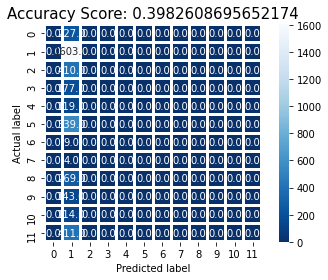

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

score = modelo.score(x_test,y_test)

sns.heatmap(cm, annot=True, fmt=".1f", linewidths=2, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);